Total images before balancing: 124622
Total images each class balances to: 15000
Total images after balancing: 120000

--- Training with OVERSAMPLING ---


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 98, 98, 32)        │             896 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_20              │ (None, 49, 49, 32)        │               0 │ conv2d_20[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_21 (Conv2D)            │ (None, 47, 47, 64)        │          18,496 │ max_pooling2d_20[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_21              │ (None, 23, 23, 64)        │               0 │ conv2d_21[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_10 (Flatten)          │ (None, 33856)             │               0 │ max_pooling2d_21[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 128)               │       4,333,696 │ flatten_10[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ binary_output (Dense)         │ (None, 1)                 │             129 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ raw_multiclass_logits (Dense) │ (None, 8)                 │           1,032 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_6 (Multiply)         │ (None, 8)                 │               0 │ raw_multiclass_logits[0][… │
│                               │                           │                 │ binary_output[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiclass_output             │ (None, 8)                 │               0 │ multiply_6[0][0]           │
│ (Activation)                  │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,354,249 (16.61 MB)

 Trainable params: 4,354,249 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - binary_output_accuracy: 0.6878 - binary_output_loss: 0.6115 - loss: 2.6044 - multiclass_output_accuracy: 0.2021 - multiclass_output_loss: 1.9928 - val_binary_output_accuracy: 0.8477 - val_binary_output_loss: 0.3735 - val_loss: 2.2697 - val_multiclass_output_accuracy: 0.2699 - val_multiclass_output_loss: 1.8966
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 163s 982ms/step - binary_output_accuracy: 0.8512 - binary_output_loss: 0.3705 - loss: 2.0945 - multiclass_output_accuracy: 0.3284 - multiclass_output_loss: 1.7239 - val_binary_output_accuracy: 0.8846 - val_binary_output_loss: 0.3549 - val_loss: 1.9796 - val_multiclass_output_accuracy: 0.3579 - val_multiclass_output_loss: 1.6251
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - binary_output_accuracy: 0.8797 - binary_output_loss: 0.3543 - loss: 1.9167 - multiclass_output_accuracy: 0.3826 - multiclass_output_loss: 1.5623 - val_binary_output_accuracy: 0.8926 - val_binary_output_loss: 

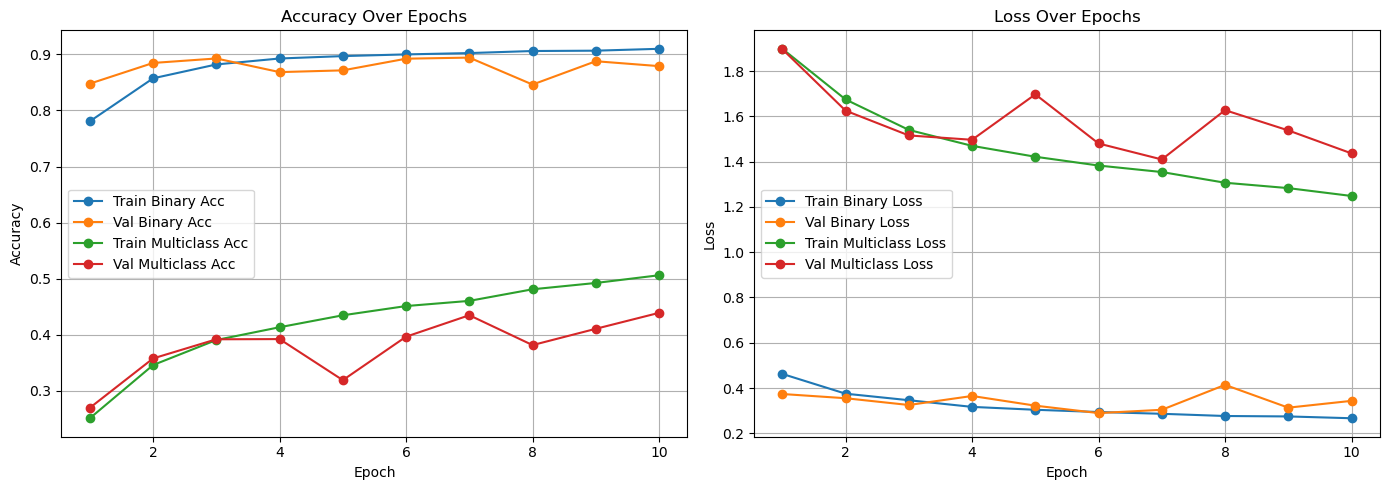


Classification Report:
                       precision    recall  f1-score   support

       Invasive_Tumor       0.41      0.59      0.48      4500
               DCIS_1       0.78      0.74      0.76      4500
               DCIS_2       0.63      0.55      0.58      4500
Prolif_Invasive_Tumor       0.48      0.29      0.36      4500

            micro avg       0.56      0.54      0.55     18000
            macro avg       0.57      0.54      0.55     18000
         weighted avg       0.57      0.54      0.55     18000



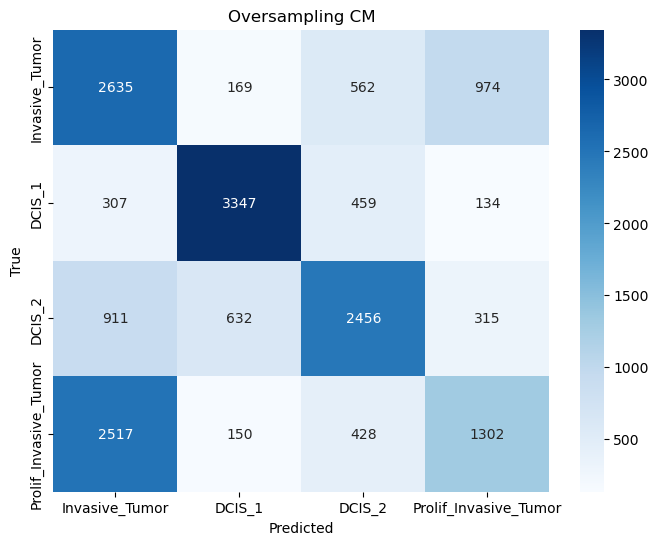

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import defaultdict
import random
import os

seed = 3888
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

img_width, img_height = 100, 100
batch_size = 512
AUTOTUNE = tf.data.AUTOTUNE

tumour_folders = ["Invasive_Tumor", "DCIS_1", "DCIS_2", "Prolif_Invasive_Tumor"]
immune_folders = ["CD4+_T_Cells", "CD8+_T_Cells", "B_Cells", "Stromal"]
sub_label_list = tumour_folders + immune_folders
sub_label_to_index = {name: idx for idx, name in enumerate(sub_label_list)}

def get_file_label_pairs(folders, main_label):
    pairs = []
    for folder in folders:
        files = tf.io.gfile.glob(os.path.join(folder, "*.png"))
        for f in files:
            sub_label = os.path.basename(folder)
            pairs.append((f, main_label, sub_label))
    return pairs

tumour_files = get_file_label_pairs(tumour_folders, main_label=1)
immune_files = get_file_label_pairs(immune_folders, main_label=0)
all_file_label_pairs = tumour_files + immune_files
print(f"Total images before balancing: {len(all_file_label_pairs)}")

def create_balanced_equal_dataset(file_label_pairs, target_size=15000):
    label_to_files = defaultdict(list)
    for f, main_label, sub_label in file_label_pairs:
        label_to_files[sub_label].append((f, main_label, sub_label))

    balanced = []
    for sub_label, files in label_to_files.items():
        originals = files.copy()
        current_size = len(originals)

        if current_size < target_size:
            extra_needed = target_size - current_size
            oversampled_files = random.choices(originals, k=extra_needed)
            balanced.extend((f, m, s, False) for f, m, s in originals)
            balanced.extend((f, m, s, True) for f, m, s in oversampled_files)
        elif current_size > target_size:
            undersampled_files = random.sample(originals, k=target_size)
            balanced.extend((f, m, s, False) for f, m, s in undersampled_files)
        else:
            balanced.extend((f, m, s, False) for f, m, s in originals)

    random.shuffle(balanced)
    return balanced

target_size = 15000
balanced_pairs = create_balanced_equal_dataset(all_file_label_pairs, target_size = target_size)
print(f"Total images each class balances to: {target_size}")
print(f"Total images after balancing: {len(balanced_pairs)}")

def augment_image(img):
    angles = [0, 90, 180, 270]
    angle = random.choice(angles)
    
    if angle == 90:
        img = tf.image.rot90(img, k=1)
    elif angle == 180:
        img = tf.image.rot90(img, k=2)
    elif angle == 270:
        img = tf.image.rot90(img, k=3)

    flip_type = random.choice(['none', 'horizontal', 'vertical', 'both'])
    if flip_type == 'horizontal':
        img = tf.image.flip_left_right(img)
    elif flip_type == 'vertical':
        img = tf.image.flip_up_down(img)
    elif flip_type == 'both':
        img = tf.image.flip_left_right(img)
        img = tf.image.flip_up_down(img)

    return img

def decode_img(img_path, augment=False):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [img_width, img_height])
    img = img / 255.0
    if augment:
        img = augment_image(img)
    return img

def prepare_dataset(pairs):
    file_paths, main_labels, sub_labels, augment_flags = [], [], [], []

    for f, m, s, a in pairs:
        file_paths.append(f)
        main_labels.append(m)
        sub_labels.append(sub_label_to_index[s])
        augment_flags.append(a)

    file_paths = np.array(file_paths)
    main_labels = np.array(main_labels)
    sub_labels = np.array(sub_labels)
    augment_flags = np.array(augment_flags)

    train_files, test_files, train_main, test_main, train_sub, test_sub, train_aug, test_aug = train_test_split(
        file_paths, main_labels, sub_labels, augment_flags, test_size=0.3, stratify=sub_labels, random_state=seed
    )

    def process_path(file_path, main_label, sub_label, augment):
        img = decode_img(file_path, augment)
        return img, {"binary_output": main_label, "multiclass_output": sub_label}

    train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_main, train_sub, train_aug))
    train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(batch_size).prefetch(AUTOTUNE)

    test_ds = tf.data.Dataset.from_tensor_slices((test_files, test_main, test_sub, test_aug))
    test_ds = test_ds.map(process_path, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

    return train_ds, test_ds

def build_multitask_model():
    inputs = tf.keras.Input(shape=(img_width, img_height, 3))
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    binary_output = tf.keras.layers.Dense(1, activation='sigmoid', name="binary_output")(x)
    multiclass_logits = tf.keras.layers.Dense(8, name="raw_multiclass_logits")(x)
    scaled_logits = tf.keras.layers.Multiply()([multiclass_logits, binary_output])
    multiclass_output = tf.keras.layers.Activation('softmax', name="multiclass_output")(scaled_logits)

    model = tf.keras.Model(inputs=inputs, outputs=[binary_output, multiclass_output])

    model.compile(
        optimizer='adam',
        loss={
            "binary_output": "binary_crossentropy",
            "multiclass_output": "sparse_categorical_crossentropy"
        },
        metrics={
            "binary_output": "accuracy",
            "multiclass_output": "accuracy"
        }
    )

    return model

def plot_training_history(history):
    acc_bin = history.history['binary_output_accuracy']
    val_acc_bin = history.history['val_binary_output_accuracy']
    acc_multi = history.history['multiclass_output_accuracy']
    val_acc_multi = history.history['val_multiclass_output_accuracy']

    loss_bin = history.history['binary_output_loss']
    val_loss_bin = history.history['val_binary_output_loss']
    loss_multi = history.history['multiclass_output_loss']
    val_loss_multi = history.history['val_multiclass_output_loss']

    epochs_range = range(1, len(acc_bin) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc_bin, marker='o', label='Train Binary Acc')
    plt.plot(epochs_range, val_acc_bin, marker='o', label='Val Binary Acc')
    plt.plot(epochs_range, acc_multi, marker='o', label='Train Multiclass Acc')
    plt.plot(epochs_range, val_acc_multi, marker='o', label='Val Multiclass Acc')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss_bin, marker='o', label='Train Binary Loss')
    plt.plot(epochs_range, val_loss_bin, marker='o', label='Val Binary Loss')
    plt.plot(epochs_range, loss_multi, marker='o', label='Train Multiclass Loss')
    plt.plot(epochs_range, val_loss_multi, marker='o', label='Val Multiclass Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def train_and_evaluate(train_ds, test_ds, title="Model"):
    model = build_multitask_model()
    model.summary()

    history = model.fit(train_ds, epochs=10, validation_data=test_ds)

    results = model.evaluate(test_ds)
    print(f"\nTest results - {title}:")
    print(f"Binary Accuracy: {results[3]:.4f}")
    print(f"Multiclass Accuracy: {results[4]:.4f}")

    y_true, y_pred = [], []

    for images, labels in test_ds:
        preds = model.predict(images, verbose=0)
        bin_preds = preds[0].flatten()
        multi_preds = preds[1]

        true_bin = labels['binary_output'].numpy().flatten()
        true_multi = labels['multiclass_output'].numpy().flatten()

        tumour_indices = np.where(true_bin == 1)[0]
        if len(tumour_indices) > 0:
            y_true.extend(true_multi[tumour_indices])
            y_pred.extend(np.argmax(multi_preds[tumour_indices], axis=1))

    if y_true and y_pred:
        y_true_tumour = np.array(y_true)
        y_pred_tumour = np.array(y_pred)

    plot_training_history(history)

    return model, y_true_tumour, y_pred_tumour

def plot_confusion_and_report(y_true, y_pred, labels, label_names, title="Confusion Matrix"):
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, labels=labels, target_names=label_names))

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

train_ds_over, test_ds_over = prepare_dataset(balanced_pairs)

print("\n--- Training with OVERSAMPLING ---")
model_over, y_true_tumour, y_pred_tumour = train_and_evaluate(train_ds_over, test_ds_over, title="Oversampling")

tumour_labels = [0, 1, 2, 3]
plot_confusion_and_report(y_true_tumour, y_pred_tumour, labels=tumour_labels, label_names=tumour_folders, title="Oversampling CM")

### CLAHE

Total images before balancing: 124622
Total images each class balances to: 15000
Total images after balancing: 120000

--- Training with MS+CLAHE ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 98, 98, 32)        │             896 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 49, 49, 32)        │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 47, 47, 64)        │          18,496 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 23, 23, 64)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 33856)             │               0 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 128)               │       4,333,696 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ binary_output (Dense)         │ (None, 1)                 │             129 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiclass_output (Dense)     │ (None, 8)                 │           1,032 │ dense_1[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,354,249 (16.61 MB)

 Trainable params: 4,354,249 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
188/188 ━━━━━━━━━━━━━━━━━━━━ 188s 981ms/step - binary_output_accuracy: 0.7692 - binary_output_loss: 0.4648 - loss: 1.8604 - multiclass_output_accuracy: 0.1684 - multiclass_output_loss: 1.3956 - val_binary_output_accuracy: 0.8805 - val_binary_output_loss: 0.2905 - val_loss: 1.4347 - val_multiclass_output_accuracy: 0.2209 - val_multiclass_output_loss: 1.1443
Epoch 2/9
188/188 ━━━━━━━━━━━━━━━━━━━━ 177s 933ms/step - binary_output_accuracy: 0.8856 - binary_output_loss: 0.2904 - loss: 1.3444 - multiclass_output_accuracy: 0.2736 - multiclass_output_loss: 1.0540 - val_binary_output_accuracy: 0.8627 - val_binary_output_loss: 0.3134 - val_loss: 1.3447 - val_multiclass_output_accuracy: 0.2733 - val_multiclass_output_loss: 1.0314
Epoch 3/9
188/188 ━━━━━━━━━━━━━━━━━━━━ 176s 933ms/step - binary_output_accuracy: 0.8933 - binary_output_loss: 0.2706 - loss: 1.2304 - multiclass_output_accuracy: 0.3027 - multiclass_output_loss: 0.9598 - val_binary_output_accuracy: 0.8906 - val_binary_output_los

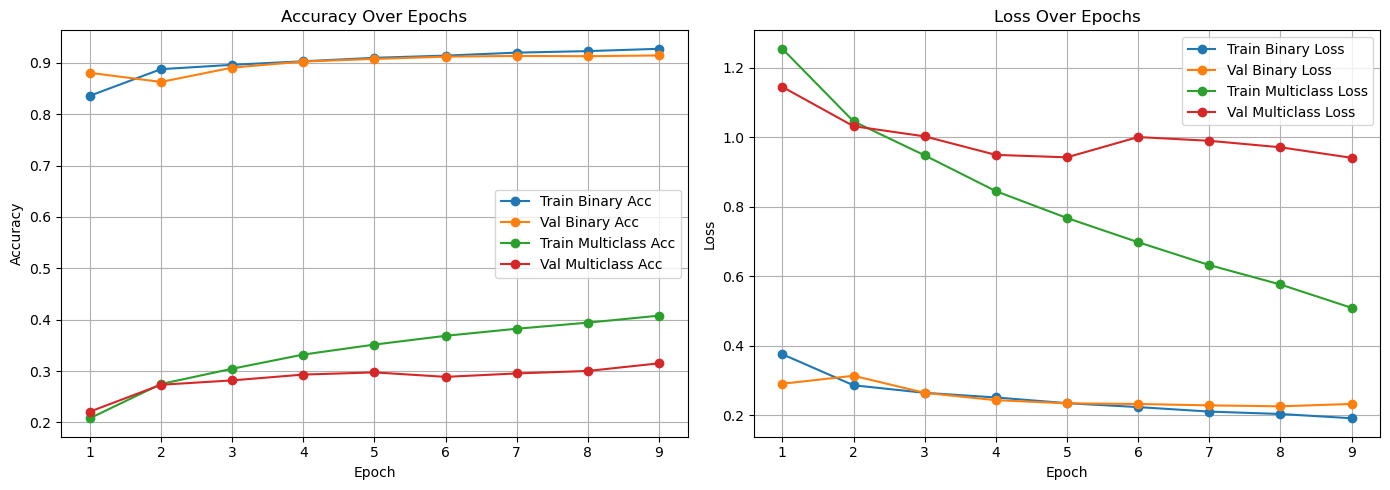


Classification Report:
                       precision    recall  f1-score   support

       Invasive_Tumor       0.50      0.49      0.50      2884
               DCIS_1       0.85      0.77      0.81      2817
               DCIS_2       0.63      0.74      0.68      2866
Prolif_Invasive_Tumor       0.57      0.53      0.55      2878

             accuracy                           0.63     11445
            macro avg       0.64      0.63      0.63     11445
         weighted avg       0.64      0.63      0.63     11445



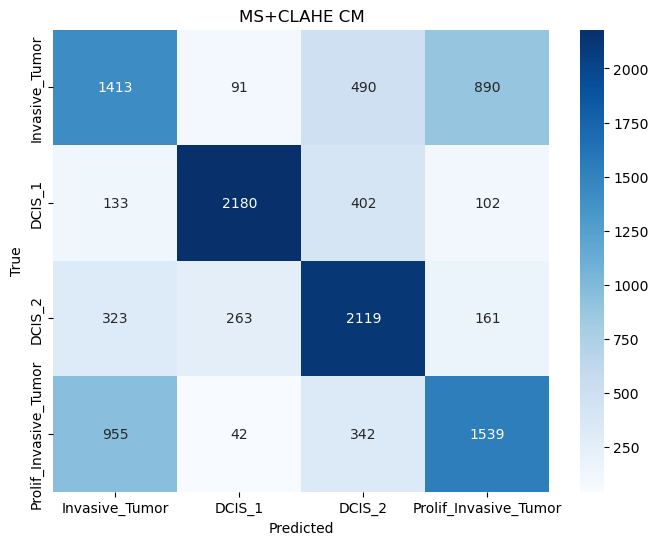

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import defaultdict
import random
import os
import cv2
import pandas as pd

seed = 3888
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

img_width, img_height = 100, 100
batch_size = 512
AUTOTUNE = tf.data.AUTOTUNE

tumour_folders = ["Invasive_Tumor", "DCIS_1", "DCIS_2", "Prolif_Invasive_Tumor"]
immune_folders = ["CD4+_T_Cells", "CD8+_T_Cells", "B_Cells", "Stromal"]
sub_label_list = tumour_folders + immune_folders
sub_label_to_index = {name: idx for idx, name in enumerate(sub_label_list)}

def get_file_label_pairs(folders, main_label):
    pairs = []
    for folder in folders:
        files = tf.io.gfile.glob(os.path.join(folder, "*.png"))
        for f in files:
            sub_label = os.path.basename(folder)
            pairs.append((f, main_label, sub_label))
    return pairs

tumour_files = get_file_label_pairs(tumour_folders, main_label=1)
immune_files = get_file_label_pairs(immune_folders, main_label=0)
all_file_label_pairs = tumour_files + immune_files
print(f"Total images before balancing: {len(all_file_label_pairs)}")

def create_balanced_equal_dataset(file_label_pairs, target_size=15000):
    label_to_files = defaultdict(list)
    for f, main_label, sub_label in file_label_pairs:
        label_to_files[sub_label].append((f, main_label, sub_label))

    balanced = []
    for sub_label, files in label_to_files.items():
        originals = files.copy()
        current_size = len(originals)

        if current_size < target_size:
            extra_needed = target_size - current_size
            oversampled_files = random.choices(originals, k=extra_needed)
            balanced.extend((f, m, s, False) for f, m, s in originals)
            balanced.extend((f, m, s, True) for f, m, s in oversampled_files)
        elif current_size > target_size:
            undersampled_files = random.sample(originals, k=target_size)
            balanced.extend((f, m, s, False) for f, m, s in undersampled_files)
        else:
            balanced.extend((f, m, s, False) for f, m, s in originals)

    random.shuffle(balanced)
    return balanced

def get_balanced_unseen_set(file_label_pairs, samples_per_class=25):
    class_to_files = defaultdict(list)
    
    for f, main_label, sub_label in file_label_pairs:
        class_to_files[sub_label].append((f, main_label, sub_label))

    unseen_set = []
    for sub_label, files in class_to_files.items():
        if len(files) < samples_per_class:
            raise ValueError(f"Not enough samples in class '{sub_label}' to select {samples_per_class}")
        selected = random.sample(files, samples_per_class)
        unseen_set.extend((f, m, s, False) for f, m, s in selected)

    random.shuffle(unseen_set)
    return unseen_set

target_size = 15000
unseen_pairs = get_balanced_unseen_set(all_file_label_pairs, samples_per_class=25)
unseen_file_paths = set(f for f, _, _, _ in unseen_pairs)
remaining_pairs = [pair for pair in all_file_label_pairs if pair[0] not in unseen_file_paths]
balanced_pairs = create_balanced_equal_dataset(remaining_pairs, target_size=target_size)
tumour_only_pairs = [pair for pair in balanced_pairs if pair[1] == 1]
print(f"Total images each class balances to: {target_size}")
print(f"Total images after balancing: {len(balanced_pairs)}")

def augment_image(img):
    angles = [0, 90, 180, 270]
    angle = random.choice(angles)
    
    if angle == 90:
        img = tf.image.rot90(img, k=1)
    elif angle == 180:
        img = tf.image.rot90(img, k=2)
    elif angle == 270:
        img = tf.image.rot90(img, k=3)

    flip_type = random.choice(['none', 'horizontal', 'vertical', 'both'])
    if flip_type == 'horizontal':
        img = tf.image.flip_left_right(img)
    elif flip_type == 'vertical':
        img = tf.image.flip_up_down(img)
    elif flip_type == 'both':
        img = tf.image.flip_left_right(img)
        img = tf.image.flip_up_down(img)

    return img

def apply_clahe(img_np):
    lab = cv2.cvtColor(img_np, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return final
    
def _load_and_preprocess(path):
    img = cv2.imread(path.numpy().decode('utf-8'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_width, img_height))
    img = apply_clahe(img)
    img = img.astype(np.float32) / 255.0
    return img
    
def decode_img(img_path, augment=False):
    img = tf.py_function(_load_and_preprocess, [img_path], tf.float32)
    img.set.shape((img_width, img_height, 3))
        
    if augment:
        img = augment_image(img)
    return img

def prepare_dataset(pairs):
    file_paths, main_labels, sub_labels, augment_flags = [], [], [], []

    for f, m, s, a in pairs:
        file_paths.append(f)
        main_labels.append(m)
        sub_labels.append(sub_label_to_index[s] if m==1 else -1)
        augment_flags.append(a)

    file_paths = np.array(file_paths)
    main_labels = np.array(main_labels)
    sub_labels = np.array(sub_labels)
    augment_flags = np.array(augment_flags)

    train_files, test_files, train_main, test_main, train_sub, test_sub, train_aug, test_aug = train_test_split(
        file_paths, main_labels, sub_labels, augment_flags, test_size=0.2, stratify=main_labels, random_state=seed
    )

    def process_path(file_path, main_label, sub_label, augment_flag):
        img = tf.py_function(_load_and_preprocess, [file_path], tf.float32)
        img.set_shape((img_width, img_height, 3))
        
        img = tf.cond(
            augment_flag,
            lambda: augment_image(img),
            lambda: img
        )
    
        return img, {"binary_output": main_label, "multiclass_output": sub_label}

    train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_main, train_sub, train_aug))
    train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(batch_size).prefetch(AUTOTUNE)

    test_ds = tf.data.Dataset.from_tensor_slices((test_files, test_main, test_sub, test_aug))
    test_ds = test_ds.map(process_path, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

    return train_ds, test_ds

def create_unseen_dataset(unseen_pairs):
    file_paths, main_labels, sub_labels, _ = zip(*unseen_pairs)

    file_paths = np.array(file_paths)
    main_labels = np.array(main_labels)
    sub_labels = np.array([sub_label_to_index[s] if m == 1 else -1 for s, m in zip(sub_labels, main_labels)])

    def process_unseen(file_path, main_label, sub_label):
        img = tf.py_function(_load_and_preprocess, [file_path], tf.float32)
        img.set_shape((img_width, img_height, 3))
        return img, {"binary_output": main_label, "multiclass_output": sub_label}

    ds = tf.data.Dataset.from_tensor_slices((file_paths, main_labels, sub_labels))
    ds = ds.map(process_unseen, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

    return ds

def masked_sparse_categorical_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int32)
    mask = tf.not_equal(y_true, -1)
    y_true_filtered = tf.boolean_mask(y_true, mask)
    y_pred_filtered = tf.boolean_mask(y_pred, mask)

    return tf.reduce_mean(
        tf.keras.losses.sparse_categorical_crossentropy(y_true_filtered, y_pred_filtered)
    )

def build_multitask_model():
    inputs = tf.keras.Input(shape=(img_width, img_height, 3))
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    binary_output = tf.keras.layers.Dense(1, activation='sigmoid', name="binary_output")(x)
    multiclass_output = tf.keras.layers.Dense(8, activation='softmax', name="multiclass_output")(x)

    model = tf.keras.Model(inputs=inputs, outputs=[binary_output, multiclass_output])

    model.compile(
        optimizer='adam',
        loss={
            "binary_output": "binary_crossentropy",
            "multiclass_output": masked_sparse_categorical_crossentropy,
        },
        metrics={
            "binary_output": "accuracy",
            "multiclass_output": "accuracy"
        }
    )

    return model

class StopOnValAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.45):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get('val_multiclass_output_accuracy')
        if val_acc is not None and val_acc > self.threshold:
            print(f"\nReached val_multiclass_output_accuracy > {self.threshold:.2f}. Stopping training.")
            self.model.stop_training = True

def plot_training_history(history):
    acc_bin = history.history['binary_output_accuracy']
    val_acc_bin = history.history['val_binary_output_accuracy']
    acc_multi = history.history['multiclass_output_accuracy']
    val_acc_multi = history.history['val_multiclass_output_accuracy']

    loss_bin = history.history['binary_output_loss']
    val_loss_bin = history.history['val_binary_output_loss']
    loss_multi = history.history['multiclass_output_loss']
    val_loss_multi = history.history['val_multiclass_output_loss']

    epochs_range = range(1, len(acc_bin) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc_bin, marker='o', label='Train Binary Acc')
    plt.plot(epochs_range, val_acc_bin, marker='o', label='Val Binary Acc')
    plt.plot(epochs_range, acc_multi, marker='o', label='Train Multiclass Acc')
    plt.plot(epochs_range, val_acc_multi, marker='o', label='Val Multiclass Acc')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss_bin, marker='o', label='Train Binary Loss')
    plt.plot(epochs_range, val_loss_bin, marker='o', label='Val Binary Loss')
    plt.plot(epochs_range, loss_multi, marker='o', label='Train Multiclass Loss')
    plt.plot(epochs_range, val_loss_multi, marker='o', label='Val Multiclass Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def train_and_evaluate(train_ds, test_ds, title="Model"):
    model = build_multitask_model()
    model.summary()

    early_stop_callback = StopOnValAccuracy(threshold=0.45)

    history = model.fit(train_ds, epochs=9, validation_data=test_ds, callbacks=[early_stop_callback])

    history_df = pd.DataFrame(history.history)
    history_df.to_csv(f"{title.lower().replace(' ', '_')}_history.csv", index=False)

    results = model.evaluate(test_ds)
    print(f"\nTest results - {title}:")
    print(f"Binary Accuracy: {results[3]:.4f}")
    print(f"Multiclass Accuracy: {results[4]:.4f}")

    y_true, y_pred = [], []

    for images, labels in test_ds:
        preds = model.predict(images, verbose=0)
        bin_preds = preds[0].flatten()
        multi_preds = preds[1]

        true_bin = labels['binary_output'].numpy().flatten()
        true_multi = labels['multiclass_output'].numpy().flatten()

        tumour_mask = (true_bin == 1) & (bin_preds > 0.5)
    
        y_true.extend(true_multi[tumour_mask])
        y_pred.extend(np.argmax(multi_preds[tumour_mask], axis=1))
        
    if y_true and y_pred:
        y_true_tumour = np.array(y_true)
        y_pred_tumour = np.array(y_pred)

    plot_training_history(history)

    return model, y_true_tumour, y_pred_tumour

def plot_confusion_and_report(y_true, y_pred, labels, label_names, title="Confusion Matrix"):
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, labels=labels, target_names=label_names))

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

train_ds_over, test_ds_over = prepare_dataset(balanced_pairs)
train_ds_tumour, test_ds_tumour = prepare_dataset(tumour_only_pairs)
unseen_ds = create_unseen_dataset(unseen_pairs)

print("\n--- Training with MS+CLAHE ---")
model_over, y_true_tumour, y_pred_tumour = train_and_evaluate(train_ds_over, test_ds_over, title="MS+CLAHE")

tumour_labels = [0, 1, 2, 3]
plot_confusion_and_report(y_true_tumour, y_pred_tumour, labels=tumour_labels, label_names=tumour_folders, title="MS+CLAHE CM")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - binary_output_accuracy: 0.9350 - binary_output_loss: 0.1752 - loss: 1.3053 - multiclass_output_accuracy: 0.2950 - multiclass_output_loss: 1.1302

Unseen test results:
Binary Accuracy: 0.9350
Multiclass Accuracy: 0.2950

Classification Report:
                       precision    recall  f1-score   support

       Invasive_Tumor       0.48      0.60      0.54        25
               DCIS_1       0.89      0.64      0.74        25
               DCIS_2       0.62      0.72      0.67        25
Prolif_Invasive_Tumor       0.53      0.45      0.49        22

             accuracy                           0.61        97
            macro avg       0.63      0.60      0.61        97
         weighted avg       0.63      0.61      0.61        97



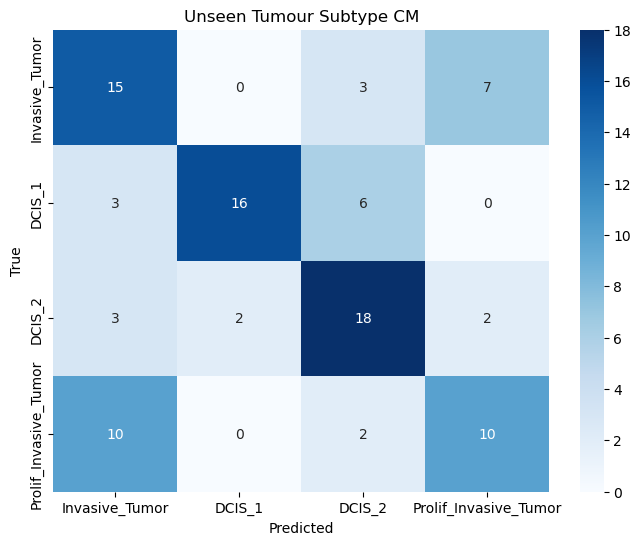

In [8]:
results = model_over.evaluate(unseen_ds)
print(f"\nUnseen test results:")
print(f"Binary Accuracy: {results[3]:.4f}")
print(f"Multiclass Accuracy: {results[4]:.4f}")

y_true, y_pred = [], []

for images, labels in unseen_ds:
    preds = model_over.predict(images, verbose=0)
    bin_preds = preds[0].flatten()
    multi_preds = preds[1]

    true_bin = labels['binary_output'].numpy().flatten()
    true_multi = labels['multiclass_output'].numpy().flatten()

    tumour_mask = (true_bin == 1) & (bin_preds > 0.5)
    y_true.extend(true_multi[tumour_mask])
    y_pred.extend(np.argmax(multi_preds[tumour_mask], axis=1))

if y_true and y_pred:
    plot_confusion_and_report(
        np.array(y_true),
        np.array(y_pred),
        labels=[0, 1, 2, 3],
        label_names=tumour_folders,
        title="Unseen Tumour Subtype CM"
    )

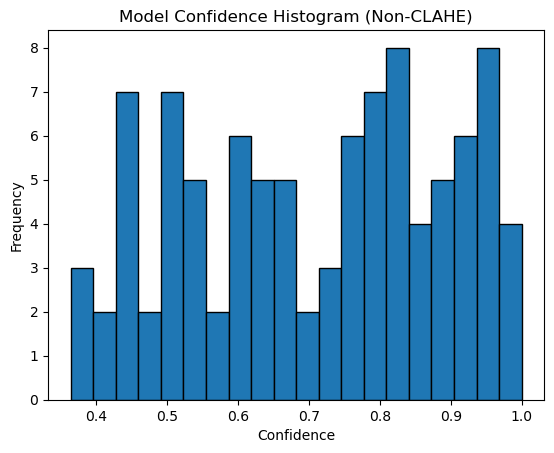

In [11]:
confidences = []

for images, labels in unseen_ds:
    preds = model_over.predict(images, verbose=0)
    bin_preds = preds[0].flatten()
    multi_preds = preds[1]

    true_bin = labels['binary_output'].numpy().flatten()
    true_multi = labels['multiclass_output'].numpy().flatten()

    tumour_mask = (true_bin == 1) & (bin_preds > 0.5)
    selected_multi_preds = multi_preds[tumour_mask]
    selected_true_multi = true_multi[tumour_mask]

    y_true.extend(selected_true_multi)
    y_pred.extend(np.argmax(selected_multi_preds, axis=1))

    confidences.extend(np.max(selected_multi_preds, axis=1))

plt.hist(confidences, bins=20, edgecolor='black')
plt.title('Model Confidence Histogram (Non-CLAHE)')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import defaultdict
import random
import os
import cv2
import pandas as pd

seed = 3888
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

img_width, img_height = 100, 100
batch_size = 512
AUTOTUNE = tf.data.AUTOTUNE

tumour_folders = ["Invasive_Tumor", "DCIS_1", "DCIS_2", "Prolif_Invasive_Tumor"]
immune_folders = ["CD4+_T_Cells", "CD8+_T_Cells", "B_Cells", "Stromal"]
sub_label_list = tumour_folders + immune_folders
sub_label_to_index = {name: idx for idx, name in enumerate(sub_label_list)}

def get_file_label_pairs(folders, main_label):
    pairs = []
    for folder in folders:
        files = tf.io.gfile.glob(os.path.join(folder, "*.png"))
        for f in files:
            sub_label = os.path.basename(folder)
            pairs.append((f, main_label, sub_label))
    return pairs

tumour_files = get_file_label_pairs(tumour_folders, main_label=1)
immune_files = get_file_label_pairs(immune_folders, main_label=0)
all_file_label_pairs = tumour_files + immune_files
print(f"Total images before balancing: {len(all_file_label_pairs)}")

def create_balanced_equal_dataset(file_label_pairs, target_size=15000):
    label_to_files = defaultdict(list)
    for f, main_label, sub_label in file_label_pairs:
        label_to_files[sub_label].append((f, main_label, sub_label))

    balanced = []
    for sub_label, files in label_to_files.items():
        originals = files.copy()
        current_size = len(originals)

        if current_size < target_size:
            extra_needed = target_size - current_size
            oversampled_files = random.choices(originals, k=extra_needed)
            balanced.extend((f, m, s, False) for f, m, s in originals)
            balanced.extend((f, m, s, True) for f, m, s in oversampled_files)
        elif current_size > target_size:
            undersampled_files = random.sample(originals, k=target_size)
            balanced.extend((f, m, s, False) for f, m, s in undersampled_files)
        else:
            balanced.extend((f, m, s, False) for f, m, s in originals)

    random.shuffle(balanced)
    return balanced

def get_balanced_unseen_set(file_label_pairs, samples_per_class=25):
    class_to_files = defaultdict(list)
    
    for f, main_label, sub_label in file_label_pairs:
        class_to_files[sub_label].append((f, main_label, sub_label))

    unseen_set = []
    for sub_label, files in class_to_files.items():
        if len(files) < samples_per_class:
            raise ValueError(f"Not enough samples in class '{sub_label}' to select {samples_per_class}")
        selected = random.sample(files, samples_per_class)
        unseen_set.extend((f, m, s, False) for f, m, s in selected)

    random.shuffle(unseen_set)
    return unseen_set

target_size = 15000
unseen_pairs = get_balanced_unseen_set(all_file_label_pairs, samples_per_class=25)
unseen_file_paths = set(f for f, _, _, _ in unseen_pairs)
remaining_pairs = [pair for pair in all_file_label_pairs if pair[0] not in unseen_file_paths]
balanced_pairs = create_balanced_equal_dataset(remaining_pairs, target_size=target_size)
tumour_only_pairs = [pair for pair in balanced_pairs if pair[1] == 1]
print(f"Total images each class balances to: {target_size}")
print(f"Total images after balancing: {len(balanced_pairs)}")

def augment_image(img):
    angles = [0, 90, 180, 270]
    angle = random.choice(angles)
    
    if angle == 90:
        img = tf.image.rot90(img, k=1)
    elif angle == 180:
        img = tf.image.rot90(img, k=2)
    elif angle == 270:
        img = tf.image.rot90(img, k=3)

    flip_type = random.choice(['none', 'horizontal', 'vertical', 'both'])
    if flip_type == 'horizontal':
        img = tf.image.flip_left_right(img)
    elif flip_type == 'vertical':
        img = tf.image.flip_up_down(img)
    elif flip_type == 'both':
        img = tf.image.flip_left_right(img)
        img = tf.image.flip_up_down(img)

    return img

def apply_clahe(img_np):
    lab = cv2.cvtColor(img_np, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return final
    
def _load_and_preprocess(path):
    img = cv2.imread(path.numpy().decode('utf-8'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_width, img_height))
    img = apply_clahe(img)
    img = img.astype(np.float32) / 255.0
    return img
    
def decode_img(img_path, augment=False):
    img = tf.py_function(_load_and_preprocess, [img_path], tf.float32)
    img.set.shape((img_width, img_height, 3))
        
    if augment:
        img = augment_image(img)
    return img

def prepare_dataset(pairs):
    file_paths, main_labels, sub_labels, augment_flags = [], [], [], []

    for f, m, s, a in pairs:
        file_paths.append(f)
        main_labels.append(m)
        sub_labels.append(sub_label_to_index[s] if m==1 else -1)
        augment_flags.append(a)

    file_paths = np.array(file_paths)
    main_labels = np.array(main_labels)
    sub_labels = np.array(sub_labels)
    augment_flags = np.array(augment_flags)

    train_files, test_files, train_main, test_main, train_sub, test_sub, train_aug, test_aug = train_test_split(
        file_paths, main_labels, sub_labels, augment_flags, test_size=0.2, stratify=main_labels, random_state=seed
    )

    def process_path(file_path, main_label, sub_label, augment_flag):
        img = tf.py_function(_load_and_preprocess, [file_path], tf.float32)
        img.set_shape((img_width, img_height, 3))
        
        img = tf.cond(
            augment_flag,
            lambda: augment_image(img),
            lambda: img
        )
    
        return img, {"binary_output": main_label, "multiclass_output": sub_label}

    train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_main, train_sub, train_aug))
    train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(batch_size).prefetch(AUTOTUNE)

    test_ds = tf.data.Dataset.from_tensor_slices((test_files, test_main, test_sub, test_aug))
    test_ds = test_ds.map(process_path, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

    return train_ds, test_ds

def create_unseen_dataset(unseen_pairs):
    file_paths, main_labels, sub_labels, _ = zip(*unseen_pairs)

    file_paths = np.array(file_paths)
    main_labels = np.array(main_labels)
    sub_labels = np.array([sub_label_to_index[s] if m == 1 else -1 for s, m in zip(sub_labels, main_labels)])

    def process_unseen(file_path, main_label, sub_label):
        img = tf.py_function(_load_and_preprocess, [file_path], tf.float32)
        img.set_shape((img_width, img_height, 3))
        return img, {"binary_output": main_label, "multiclass_output": sub_label}

    ds = tf.data.Dataset.from_tensor_slices((file_paths, main_labels, sub_labels))
    ds = ds.map(process_unseen, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

    return ds

def masked_sparse_categorical_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int32)
    mask = tf.not_equal(y_true, -1)
    y_true_filtered = tf.boolean_mask(y_true, mask)
    y_pred_filtered = tf.boolean_mask(y_pred, mask)

    return tf.reduce_mean(
        tf.keras.losses.sparse_categorical_crossentropy(y_true_filtered, y_pred_filtered)
    )

def build_multitask_model():
    inputs = tf.keras.Input(shape=(img_width, img_height, 3))
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    binary_output = tf.keras.layers.Dense(1, activation='sigmoid', name="binary_output")(x)
    multiclass_output = tf.keras.layers.Dense(8, activation='softmax', name="multiclass_output")(x)

    model = tf.keras.Model(inputs=inputs, outputs=[binary_output, multiclass_output])

    model.compile(
        optimizer='adam',
        loss={
            "binary_output": "binary_crossentropy",
            "multiclass_output": masked_sparse_categorical_crossentropy,
        },
        metrics={
            "binary_output": "accuracy",
            "multiclass_output": "accuracy"
        }
    )

    return model

def train_and_evaluate(train_ds, test_ds, title="Model"):
    model = build_multitask_model()
    model.summary()

    history = model.fit(train_ds, epochs=9, validation_data=test_ds)

    history_df = pd.DataFrame(history.history)

    results = model.evaluate(test_ds)
    print(f"\nTest results - {title}:")
    print(f"Binary Accuracy: {results[3]:.4f}")
    print(f"Multiclass Accuracy: {results[4]:.4f}")

    y_true, y_pred = [], []

    for images, labels in test_ds:
        preds = model.predict(images, verbose=0)
        bin_preds = preds[0].flatten()
        multi_preds = preds[1]

        true_bin = labels['binary_output'].numpy().flatten()
        true_multi = labels['multiclass_output'].numpy().flatten()

        tumour_mask = (true_bin == 1) & (bin_preds > 0.5)
    
        y_true.extend(true_multi[tumour_mask])
        y_pred.extend(np.argmax(multi_preds[tumour_mask], axis=1))
        
    if y_true and y_pred:
        y_true_tumour = np.array(y_true)
        y_pred_tumour = np.array(y_pred)

    return model, y_true_tumour, y_pred_tumour, history_df

train_ds_over, test_ds_over = prepare_dataset(balanced_pairs)
train_ds_tumour, test_ds_tumour = prepare_dataset(tumour_only_pairs)
unseen_ds = create_unseen_dataset(unseen_pairs)

print("\n--- Training with MS+CLAHE ---")
dlcnn_MS_CLAHE, y_true_tumour, y_pred_tumour, history_df = train_and_evaluate(train_ds_over, test_ds_over, title="MS+CLAHE")

dlcnn_MS_CLAHE.save("Image10_app/models/dlcnn_MS_CLAHE")
history_df.to_csv("Image10_app/models/history/dlcnn_MS_CLAHE_history.csv", index=False)
np.save("Image10_app/models/outputs/dlcnn_MS_CLAHE_ytrue.npy", y_true_tumour)
np.save("Image10_app/models/outputs/dlcnn_MS_CLAHE_ypred.npy", y_pred_tumour)